In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.Functions import gen_Files, gen_ggjj
from sklearn.datasets import dump_svmlight_file, load_svmlight_file
from pylorentz import Momentum4

In [2]:
#From the TBranch data, create CSV's for ggH, data(A,B,C,D), and ggjj
gen_Files()

Tight condition: 0.21
Ptratio condition: 0.11
Etratio condition: 0.07
Mass condition: 0.00
Overall: 0.32
Done ggHout.csv
Tight condition: 0.87
Ptratio condition: 0.82
Etratio condition: 0.76
Mass condition: 0.72
Overall: 0.99
Done dataAout.csv


C:\Users\jamie\CernOpenData\Code\Functions.ipynb:303: ComplexWarning: Casting complex values to real discards the imaginary part
  },


Tight condition: 0.87
Ptratio condition: 0.81
Etratio condition: 0.76
Mass condition: 0.72
Overall: 0.99
Done dataBout.csv
Tight condition: 0.87
Ptratio condition: 0.81
Etratio condition: 0.76
Mass condition: 0.72
Overall: 0.99
Done dataCout.csv
Tight condition: 0.87
Ptratio condition: 0.81
Etratio condition: 0.76
Mass condition: 0.72
Overall: 0.99
Done dataDout.csv
Tight condition: 0.20
Ptratio condition: 0.00
Etratio condition: 0.00
Mass condition: 0.42
Overall: 0.53
Done ggjj


In [8]:
#Open a file to access the different graphs 
# df1 = pd.read_csv('./../CSVfiles/dataA.csv')
# df2 = pd.read_csv('./../CSVfiles/dataB.csv')
# df3 = pd.read_csv('./../CSVfiles/dataC.csv')
# df4 = pd.read_csv('./../CSVfiles/dataD.csv')

# df7 = pd.read_csv('./../CSVfiles/ggH.csv')
# df9 = pd.read_csv('./../CSVfiles/data_yyjj_p1.csv')

# df5 = pd.concat([df1,df2])
# del df1, df2
# df6 = pd.concat([df3,df4])
# del df3,df4
# df8 = pd.concat([df5,df6])
# del df5,df6
df = pd.read_csv('./../CSVfiles/data1516_atlas_incomplete.csv', names =['A','B','C','D','E','F',
                                                                       'G','H','I','J','K','L',
                                                                        'M','N','O','P','Q','R','S','T'])

In [10]:
#Quick look at the data
print(len(df[df['A']==1]))
print(len(df))
df
# print('This is {} percent signal data'.format((((len(df[df['label']==1]))/len(df))*100)))

23536332
23536332


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,1,33757.7,-0.483980,-2.801560,37789.2,0,0.00000,-0.204941,1,30635.7,-1.571050,0.066368,76888.2,0,0.00000,0.883154,1,73533.1,0,NaN
1,1,27437.5,2.252020,2.364170,131866.0,1,0.00000,1.859900,0,25128.0,0.567773,-0.824464,29288.1,1,0.00000,0.762839,1,72251.9,0,NaN
2,1,39665.8,-0.466753,-1.177190,44065.6,0,20.37720,17.368500,0,31900.7,-0.263602,1.915380,33015.4,0,6.29335,3.895730,0,71490.0,0,NaN
3,1,70431.9,1.686390,2.799820,196685.0,0,0.00000,4.696730,0,29260.4,-0.379558,2.268950,31393.5,0,0.00000,-0.016223,1,113897.0,1,107844.0
4,1,37984.5,-0.694645,-1.380190,47523.3,0,21.24610,19.176700,0,37794.0,0.115699,-2.605810,38047.2,0,3.30108,2.361260,0,53805.9,2,164479.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23536327,1,56220.5,-1.153330,-2.000530,97945.0,0,0.00000,2.430090,1,27623.9,-0.318445,1.502020,29036.4,0,0.00000,2.877480,0,84609.9,0,NaN
23536328,1,55005.8,1.258290,2.434580,104609.0,0,4.05496,0.363098,0,28411.5,1.544570,-0.766460,69598.8,0,0.00000,3.993810,0,79841.2,1,40202.9
23536329,1,212435.0,-0.690659,2.534260,265148.0,0,41.97700,60.829400,0,81754.2,-0.598619,-0.469114,96844.9,0,87.79520,92.538400,0,263222.0,2,96195.2
23536330,1,29699.8,-0.263598,0.370625,30737.6,0,6.31768,8.008660,0,24751.2,0.427607,-2.394880,27048.8,0,1.90910,7.852150,0,56595.8,1,41131.1


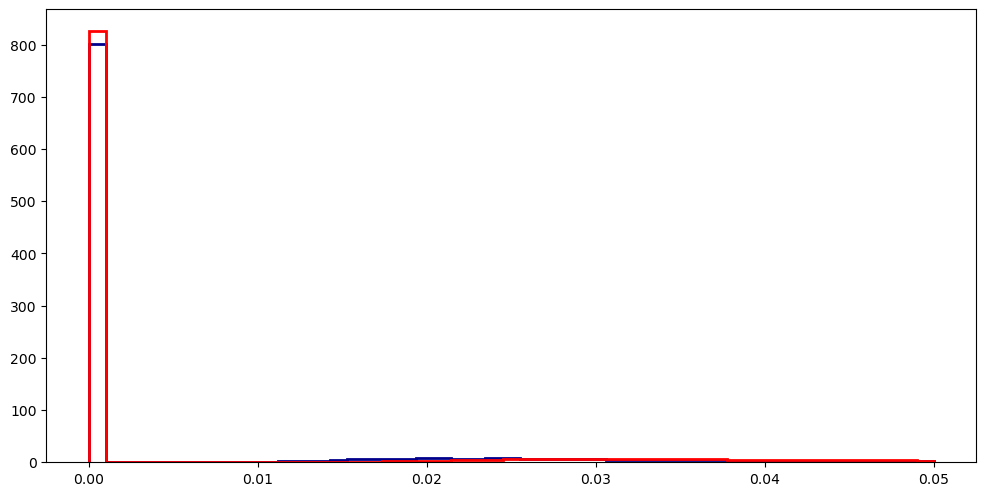

0.0
0.0


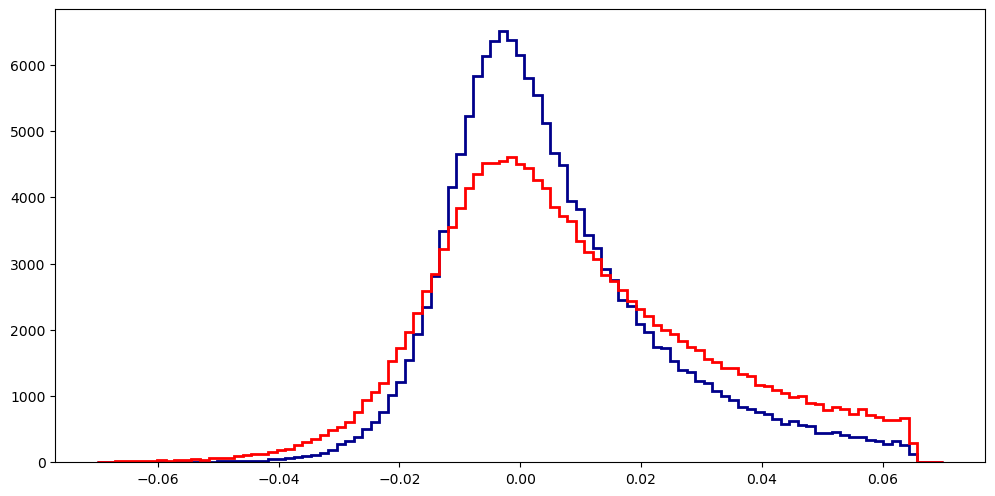

0.0
0.0


In [6]:
#For checkng ptcone, etacone
div1 = df['g1_ptcone']/df['g1_pt']
div2 = df['g2_ptcone']/df['g2_pt']
plt.figure(figsize=(12,6), dpi= 100)
xlims=[0,0.05]
bins = np.linspace(xlims[0],xlims[1],50,endpoint=True)
plt.hist(div1, color = 'darkblue', bins=bins, density = True, histtype='step', linewidth=2)
plt.hist(div2, color = 'red', bins=bins, density = True,histtype='step', linewidth=2)
plt.show()

#percent background using this cut
print(((len(div1[div1>0.05]))/(len(div1)))*100)
print(((len(div2[div2>0.05]))/(len(div2)))*100)

div1 = df['g1_etcone']/df['g1_pt']
div2 = df['g2_etcone']/df['g2_pt']
plt.figure(figsize=(12,6), dpi= 100)
xlims=[-0.07,0.07]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
plt.hist(div1, color = 'darkblue', bins=bins, histtype='step', linewidth=2)
plt.hist(div2, color = 'red', bins=bins, histtype='step', linewidth=2)
plt.show()

#percent background using this cut
print(((len(div1[div1>0.065]))/(len(div1)))*100)
print(((len(div2[div2>0.065]))/(len(div2)))*100)

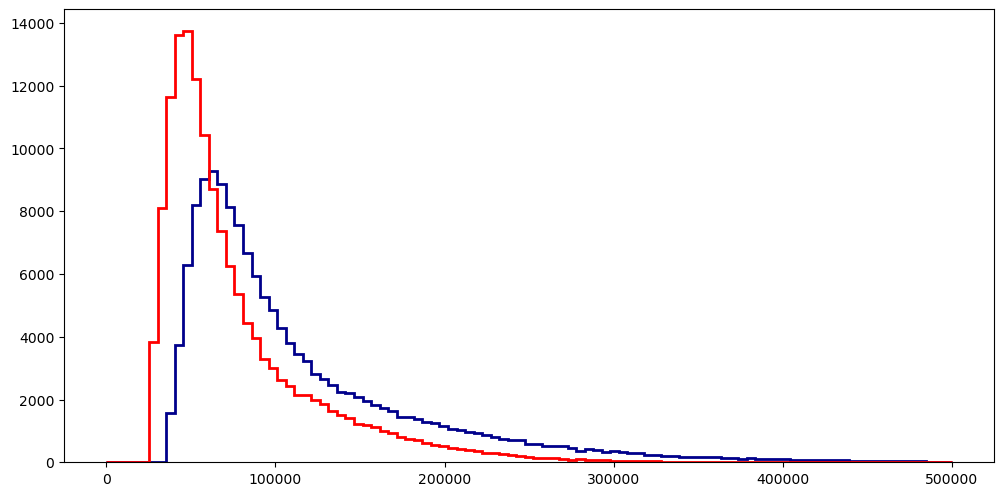

35014.8
25046.3


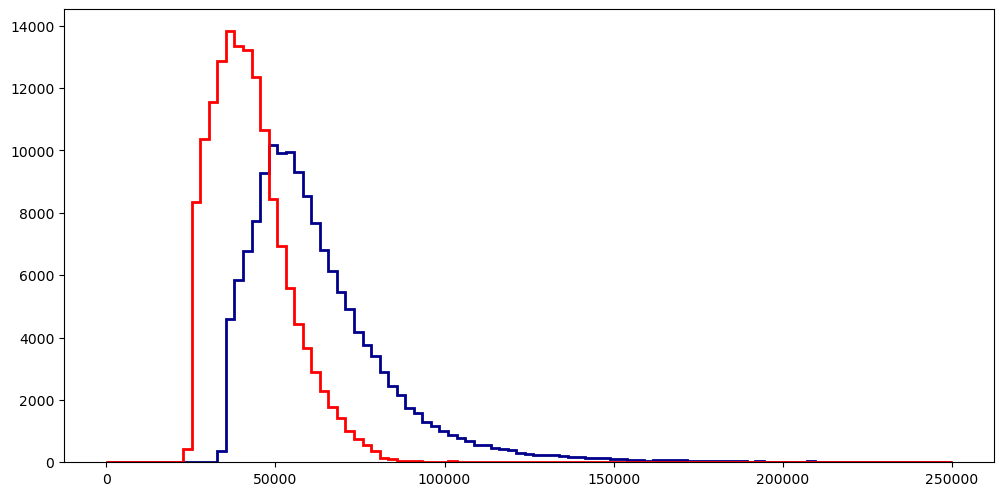

35006.3
25000.5


In [53]:
#for checking energy values
en1 = df['g1_E'].values
en2 = df['g2_E'].values
plt.figure(figsize=(12,6), dpi= 100)
xlims=[0, 500000]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
plt.hist(en1, color = 'darkblue', bins=bins, histtype='step', linewidth=2)
plt.hist(en2, color = 'red', bins=bins, histtype='step', linewidth=2)
plt.show()

print(min(en1))
print(min(en2))

pt1 = df['g1_pt'].values
pt2 = df['g2_pt'].values
plt.figure(figsize=(12,6), dpi= 100)
xlims=[0, 250000]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
plt.hist(pt1, color = 'darkblue', bins=bins, histtype='step', linewidth=2)
plt.hist(pt2, color = 'red', bins=bins, histtype='step', linewidth=2)
plt.show()

print(min(pt1))
print(min(pt2))

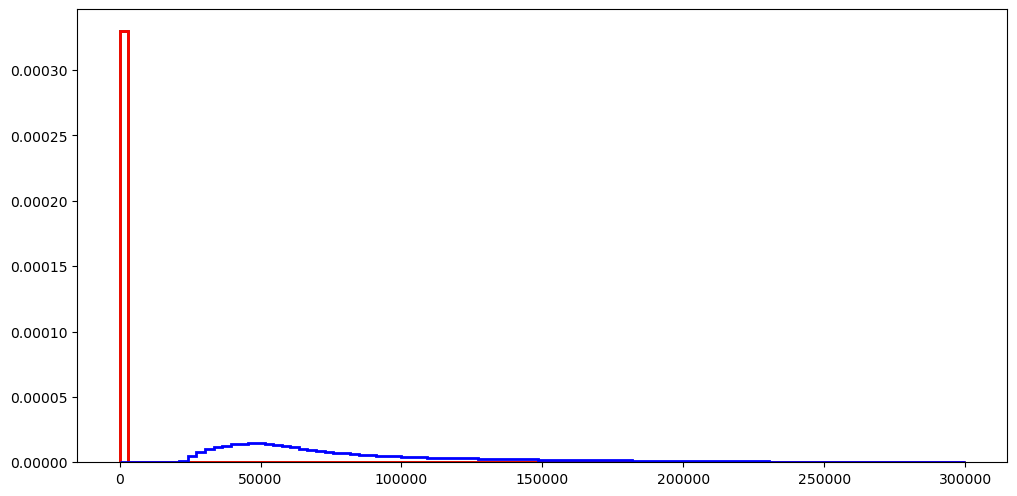

In [9]:
#Inspect the angle betwqeen photons
plt.figure(figsize=(12,6), dpi= 100)
data_del_r = df8['photon_sep'].values
sig_del_r = df7['photon_sep'].values
bkg_del_r = df9['photon_sep'].values
# sigs = df['j1_E'][df['label']==1].values
# bkgs = df['j1_E'][df['label']==0].values
xlims=[0, 300000]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
# plt.hist(bkgs, color = 'darkblue', histtype='step', bins=bins,linewidth=2)
# plt.hist(sigs, color = 'red', histtype='step', bins=bins,linewidth=2)
plt.hist(data_del_r, color = 'green', histtype='step', density=True, bins=bins,linewidth=2)
plt.hist(sig_del_r, color = 'red', histtype='step', density=True,bins=bins,linewidth=2)
plt.hist(bkg_del_r, color = 'blue', histtype='step', density=True,bins=bins,linewidth=2)
plt.show()

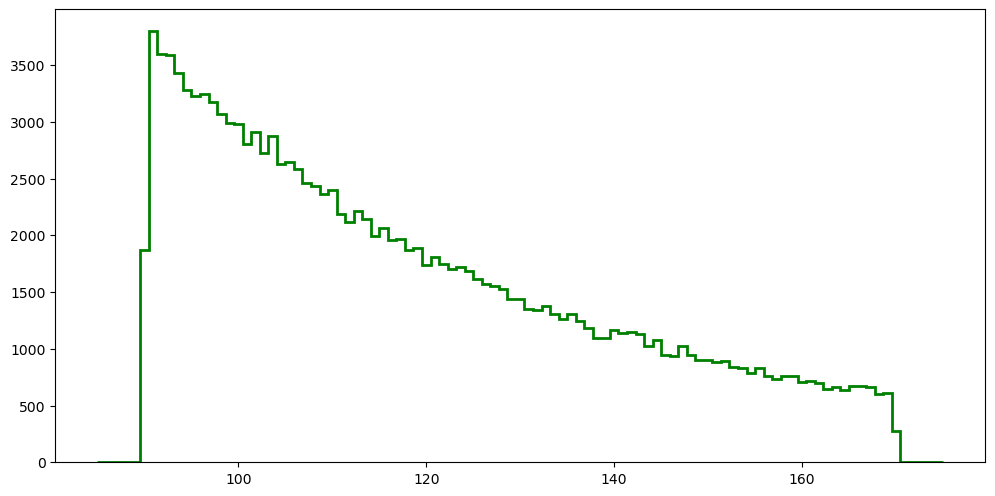

90.00003098816192
169.9986241565011


In [5]:
#Do a plot of the mass spectrum
plt.figure(figsize=(12,6), dpi= 100)
inv_m = df['p_mass'].values
# sigs = df['p_mass'][df['label']==1].values
# bkgs = df['p_mass'][df['label']==0].values

xlims=[85,175]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
# plt.hist(bkgs, color = 'darkblue', histtype='step', bins=bins,linewidth=2)
# plt.hist(sigs, color = 'red', histtype='step', bins=bins,linewidth=2)
plt.hist(inv_m, color = 'green', histtype='step', bins=bins,linewidth=2)
plt.show()

print(min(inv_m))
print(max(inv_m))

In [29]:
with open('./CSVfiles/ggH_sf.data', 'rb') as f:
    df=pickle.load(f)
df

,0,1,2,3,4,5
0,28.4857,55922600.0,0.000000,1.005130,0.999523,1.005130
1,28.4857,55922600.0,0.351687,0.970159,0.997608,0.970159
2,28.4857,55922600.0,0.553627,0.988219,0.998555,0.988219
3,28.4857,55922600.0,0.619412,0.986910,1.000000,0.986910
4,28.4857,55922600.0,0.619412,1.004190,0.994923,1.004190
...,...,...,...,...,...,...
1054705,28.4857,55922600.0,1.251330,0.952824,1.000000,0.952824
1054706,28.4857,55922600.0,1.251330,0.990247,1.000000,0.990247
1054707,28.4857,55922600.0,1.214120,0.998569,1.000000,0.998569
1054708,28.4857,55922600.0,1.320950,0.992051,0.998649,0.992051


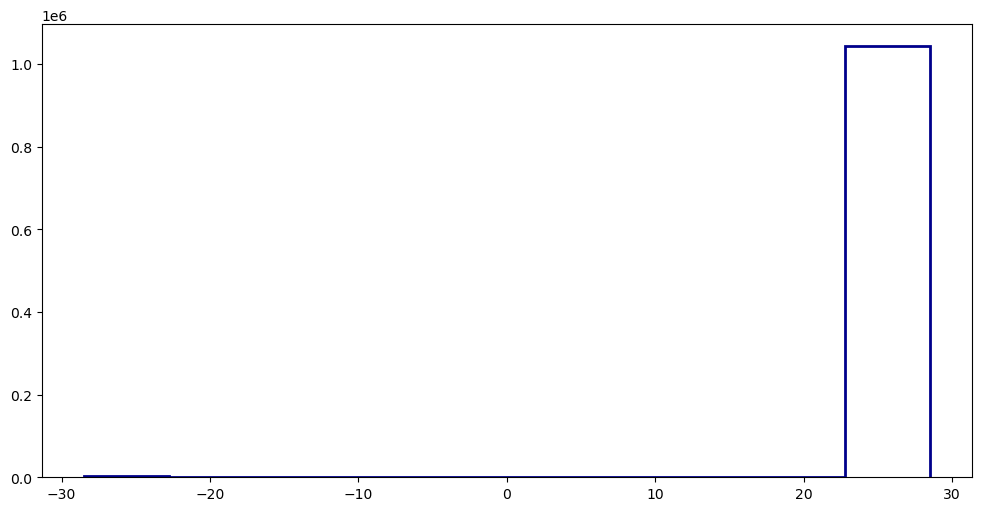

-28.4857
28.4857
2285


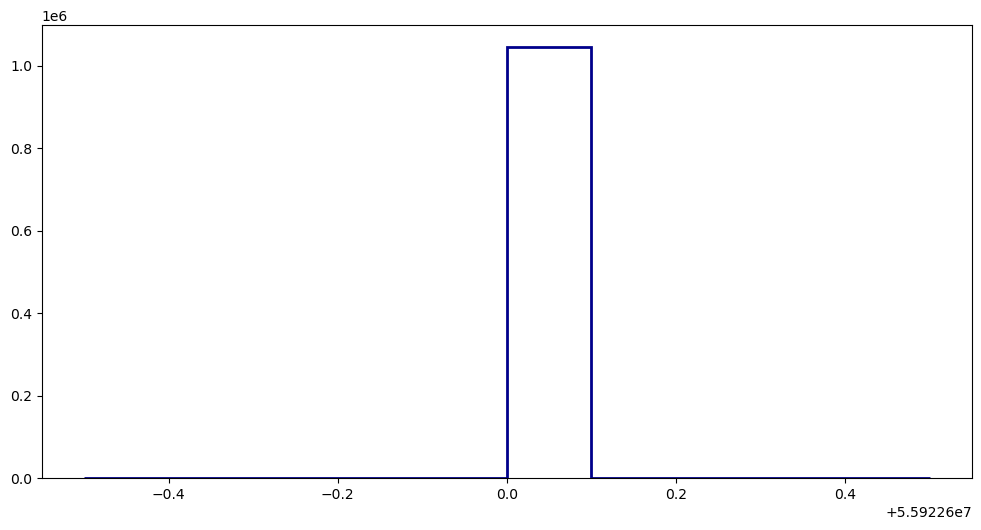

55922600.0
55922600.0


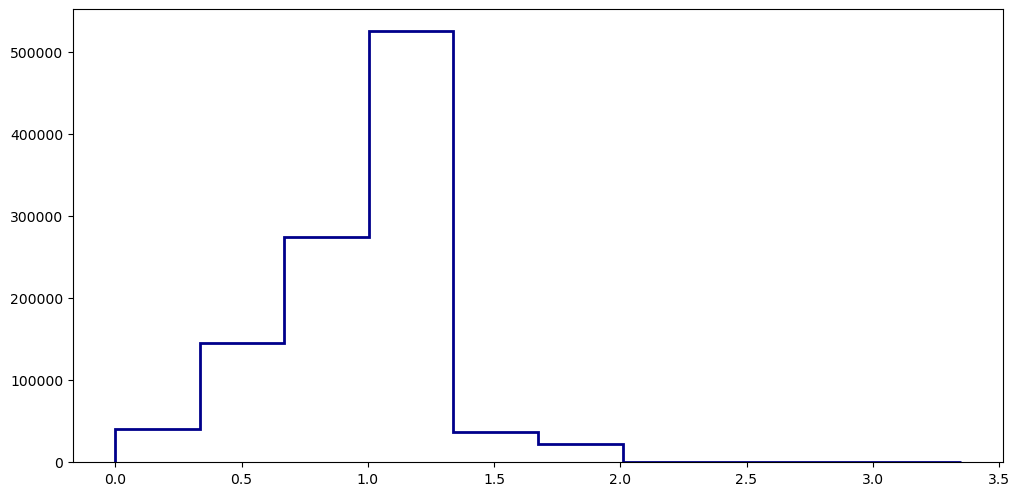

0.0
3.34815


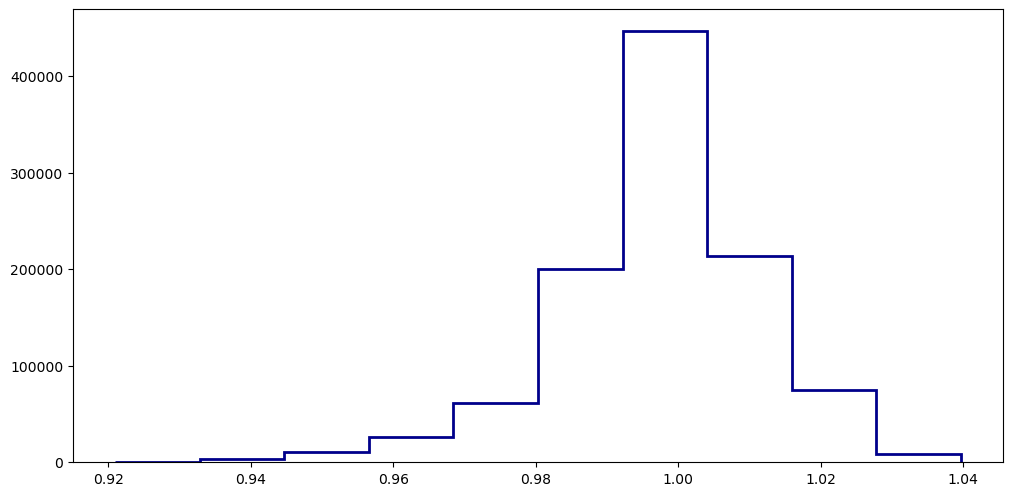

0.9209870000000001
1.0396299999999998


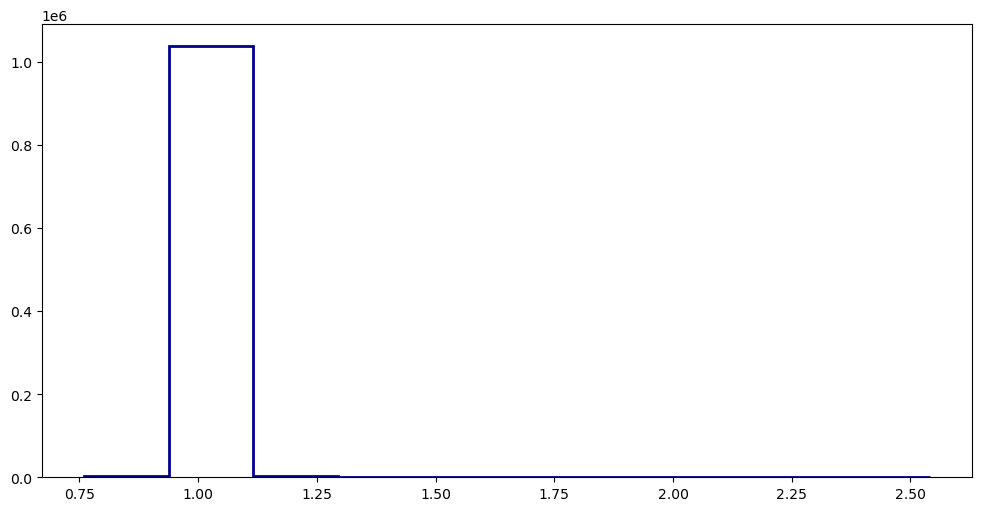

0.760089
2.54019


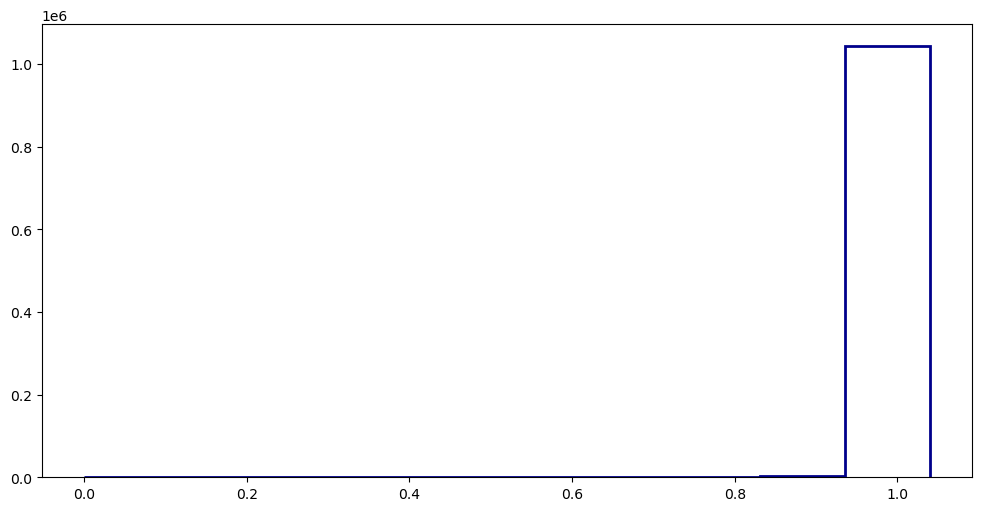

0.0
1.0396299999999998


In [8]:
#Look at scale factors 
mcWeight = df[0]
mcsum = df[1]
pileup = df[2]
photon = df[3]
btag = df[4]
phottrig = df[5]

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(mcWeight, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(mcWeight))
print(max(mcWeight))
print(len(mcWeight[mcWeight<28]))

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(mcsum, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(mcsum))
print(max(mcsum))

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(pileup, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(pileup))
print(max(pileup))

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(photon, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(photon))
print(max(photon))

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(btag, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(btag))
print(max(btag))

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(phottrig, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(phottrig))
print(max(phottrig))